In [35]:
import cv2
from matplotlib import pyplot as plt
from typing import Callable

from MediapipeEARMultiFrame import process_frames, load_images, OriginalImage, ProcessedImage, \
    cram_homogenous_images, analyse_images, AnalysedImage

from driver_state_detection.approaches.MediapipeEARMultiFrame import image_annotator
%reload_ext autoreload
%autoreload 2


In [14]:
raw_images: list[OriginalImage] = []
raw_images.extend(load_images("C:\\dev\\play\\fatigue\\Driver-State-Detection\\driver_state_detection\\training\\2024-05-30_17-50-39", 100))

Loading from C:\dev\play\fatigue\Driver-State-Detection\driver_state_detection\training\2024-05-30_17-50-39
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_17-50-39\2024-05-30_17-50-36-orig-22.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_17-50-39\2024-05-30_17-50-36-orig-23.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_17-50-39\2024-05-30_17-50-36-orig-24.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_17-50-39\2024-05-30_17-50-36-orig-25.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_17-50-39\2024-05-30_17-50-36-orig-26.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training/2024-05-30_17-50-39\2024-05-30_17-50-36-orig-27.jpg
Loading C:/dev/play/fatigue/Driver-State-Detection/driver_state_detection/training

In [41]:
just_images = [x.original_image for x in raw_images]
processed_images: list[ProcessedImage] = process_frames(just_images)

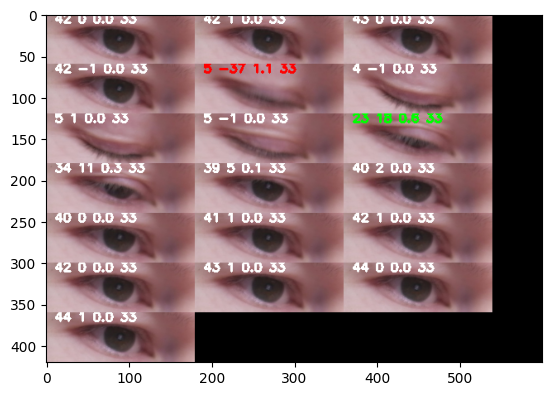

In [53]:
analysed = analyse_images(processed_images[50:100])


image_selector: Callable[[AnalysedImage], any] = lambda x: x.processed.eye_img_final

crammed = cram_homogenous_images(analysed, 600, image_selector, image_annotator)
plt.imshow(cv2.cvtColor(crammed, cv2.COLOR_BGR2RGB))